In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
import requests
%matplotlib inline

# Import Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path = '/content/drive/My Drive/project/data-science/hotel-bookings/hotel_bookings.csv'

df = pd.read_csv(path)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Data Cleaning

## Check Duplicate Data

In [5]:
print(f'Total number of duplicate is {df.duplicated().sum()}')

Total number of duplicate is 31994


In [6]:
# drop duplicate values
df = df.drop_duplicates()

# check duplicate values once again
print(f'Total number of duplicated values right now is {df.duplicated().sum()}')

Total number of duplicated values right now is 0


## Check Missing Values

In [7]:
# check missing values for each column

df.isnull().sum().rename('Total Missing Values').sort_values(ascending=False)

,Total Missing Values
company,82137
agent,12193
country,452
children,4
arrival_date_month,0
arrival_date_week_number,0
hotel,0
is_canceled,0
stays_in_weekend_nights,0
arrival_date_day_of_month,0


1. Remove rows where the country column is null, since they account for only 0.4% of the data and are unlikely to affect overall analysis.

2. Drop the company column because over 90% of its values are missing, making it unsuitable for modeling or analysis.

3. Fill missing values in the agent column with the category 'Unknown', as this feature holds important information that could contribute significantly to machine learning model performance.

In [8]:
df = df.drop(["company"], axis=1)

In [9]:
# we fill the 'agent' missing values with the average of 'agent' per 'is_canceled'

df['agent'] = df['agent'].fillna(
    df.groupby('is_canceled')['agent'].transform('mean')
)

In [10]:
# remove the rest row that have missing values

df = df.dropna()

# Explatory Data Analysis

## Distribution

In [11]:
# check categorical columns unique values to check if there is an anomali

for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 

In [12]:
# convert undefined value to Unknown value for easier preprocessing

def convert_to_unknown(col):
  return df[col].apply(lambda x: 'Unknown' if x == 'Undefined' else x)

In [13]:
cols = ['meal', 'distribution_channel']

for col in cols:
  df[col] = convert_to_unknown(col)

In [14]:
# print the result after converted

for col in cols:
  print(col)
  print(df[col].unique())
  print('-'*50)

meal
['BB' 'FB' 'HB' 'SC' 'Unknown']
--------------------------------------------------
distribution_channel
['Direct' 'Corporate' 'TA/TO' 'Unknown' 'GDS']
--------------------------------------------------


### Numerical Columns

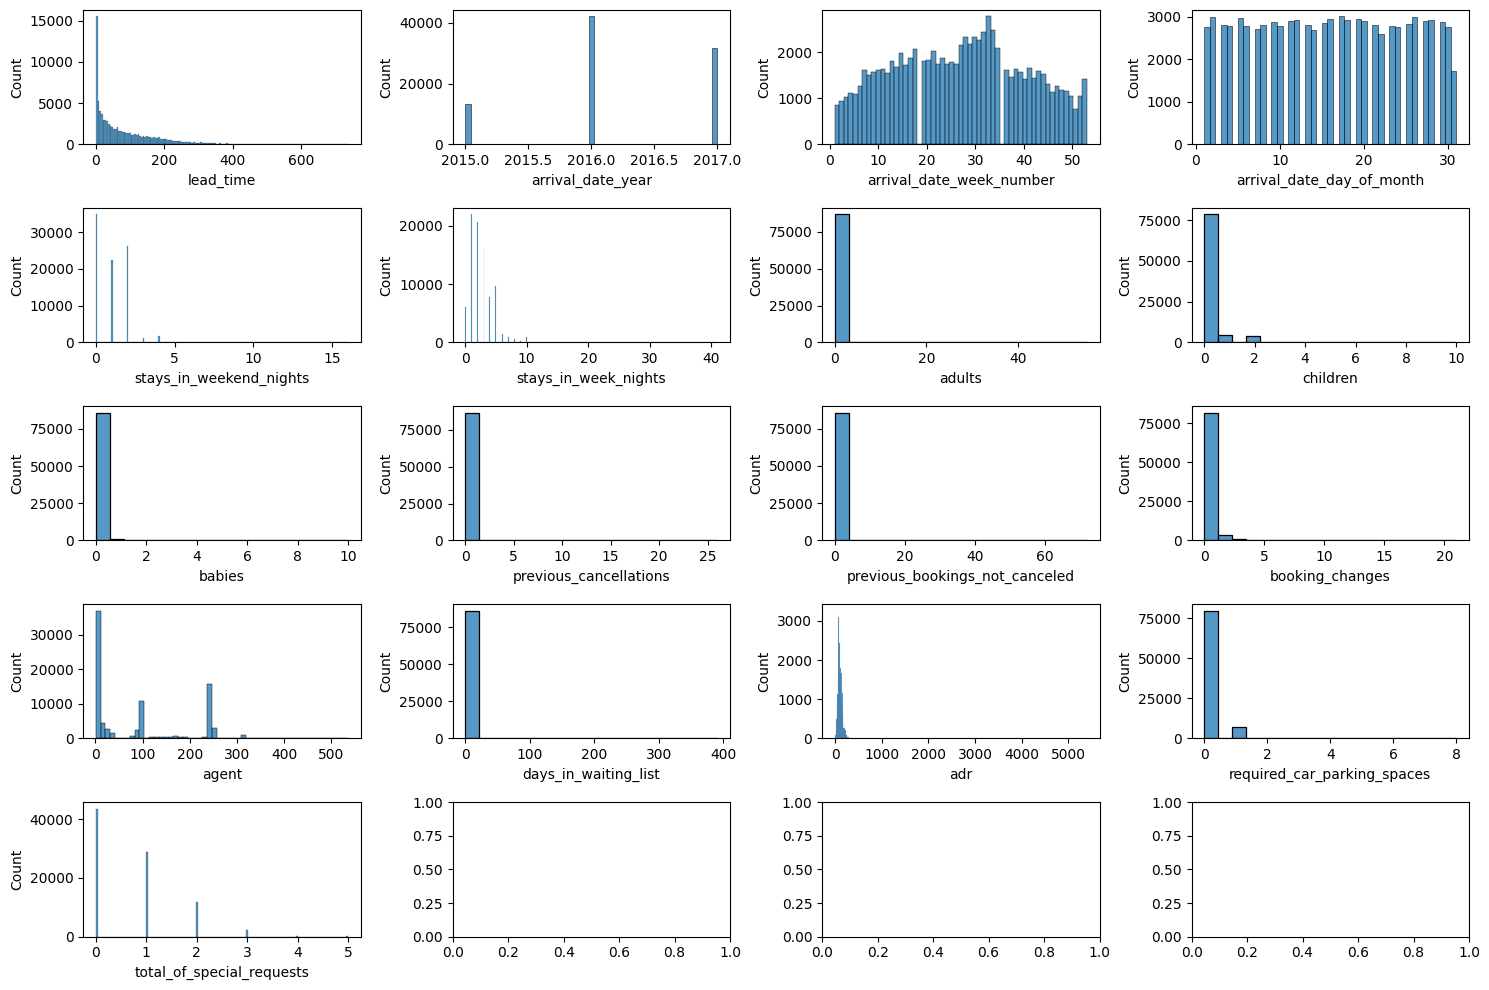

In [ ]:
# check numerical values distribution

# this drop_columns variable is the columns that represent categorical value but instead has a type int, like binary value
drop_columns = ['is_canceled', 'is_repeated_guest']

num_cols = df.drop(drop_columns, axis=1).select_dtypes(include=["float","int"]).columns
cols = 4
rows = int(np.ceil(len(num_cols) / 4))

fig, ax = plt.subplots(rows, cols,figsize=(15,10))
ax = ax.flatten()

for i in range(len(num_cols)):
    sns.histplot(data=df, x=num_cols[i], ax=ax[i])

plt.tight_layout()

<Axes: xlabel='is_canceled', ylabel='count'>

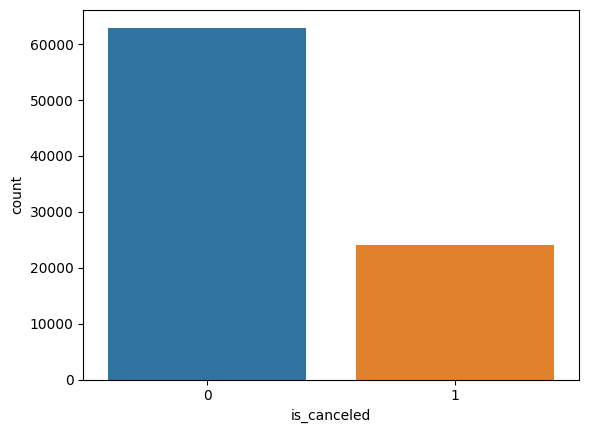

In [ ]:
# is_canceled distribution

sns.countplot(data=df, x='is_canceled', hue='is_canceled', legend=False)

<Axes: xlabel='is_repeated_guest', ylabel='count'>

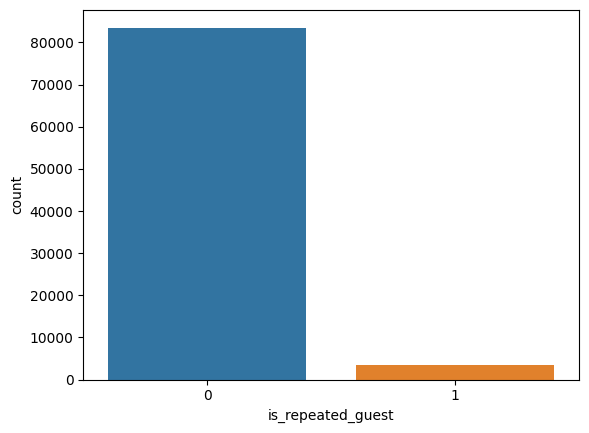

In [ ]:
# is_repeated_guest distribution

sns.countplot(data=df, x='is_repeated_guest', hue='is_repeated_guest', legend=False)

### Categorical Columns


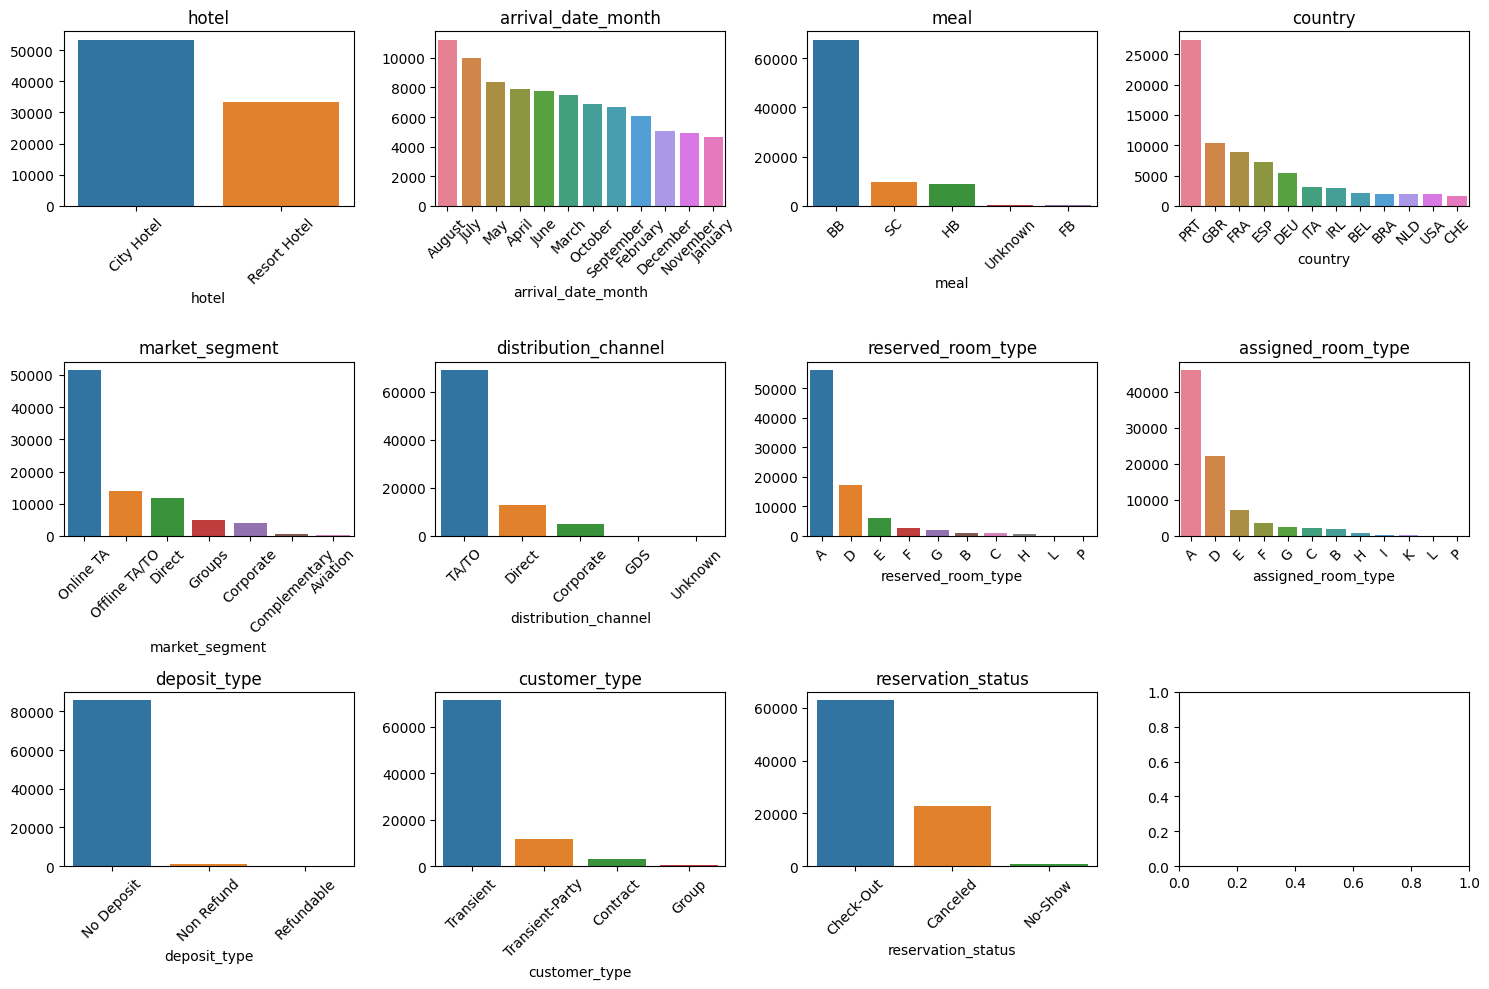

In [ ]:
cat_col = df.drop(["reservation_status_date"], axis=1).select_dtypes(include=['object']).columns
cols = 4
rows = int(np.ceil(len(cat_col)/cols))

fig, ax = plt.subplots(rows, cols, figsize=(15,10))
ax = ax.flatten()

for i in range(len(cat_col)):
    col = cat_col[i]

    val_count = df[col].value_counts().head(12)

    x = val_count.index
    y = val_count.values

    sns.barplot(x=x, y=y, ax=ax[i], hue=x)

    ax[i].set_title(col)
    ax[i].set_xticks(range(len(x)))
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)

plt.tight_layout()

# Feature Engineering

In [15]:
df['room_change'] = (df['assigned_room_type'] != df['reserved_room_type']).astype(int) # if there is a room exhange
df['total_people'] = df['adults'] + df['children'] + df['babies'] # number of groups, families, or people
df['reservation_status_date'] = pd.to_datetime(df["reservation_status_date"])
df['reservation_status_year'] = df['reservation_status_date'].dt.year
df['reservation_status_month'] = df['reservation_status_date'].dt.month
df['reservation_status_day'] = df['reservation_status_date'].dt.day
df.drop('reservation_status_date', axis=1, inplace=True)

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'room_change'],
      dtype='object')

# Preprocessing

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


In [17]:
# this column is dropped because this data is highly change determined after the target
drop_cols = ['reservation_status']

df_temp = df.drop(drop_cols, axis=1).copy()

## Label Encoding

In [18]:
# label encoding for ordinal data

df_temp['hotel'] = df_temp['hotel'].map({'Resort Hotel': 0, 'City Hotel':1})

In [19]:
# check length of categorical columns

category_cols = df_temp.select_dtypes(include=['object'])

for col in category_cols:
  print(f"{col}: {len(df_temp[col].unique())}")

arrival_date_month: 12
meal: 5
country: 177
market_segment: 7
distribution_channel: 5
reserved_room_type: 10
assigned_room_type: 12
deposit_type: 3
customer_type: 4


## Target Encoding

In [22]:
import category_encoders as ce

In [21]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.8 MB/s eta 0:00:00


In [23]:
df_temp["country"] = ce.TargetEncoder().fit_transform(df_temp["country"], df_temp['is_canceled'])

## One Hot Encoding

In [24]:
# do one hot encoding for categorical data which do not have to much unique category
# because it can create curse of dimensionality

df_encoded = pd.get_dummies(df_temp, drop_first=True)

df_encoded = df_encoded.loc[:, ~df_encoded.columns.str.contains('unknown')]

In [25]:
correlations = df_encoded.corr(numeric_only=True)['is_canceled'].drop('is_canceled')
print(correlations.sort_values(ascending=False))

market_segment_Online TA        0.210727
country                         0.189839
lead_time                       0.183730
deposit_type_Non Refund         0.164957
distribution_channel_TA/TO      0.150221
                                  ...   
distribution_channel_Direct    -0.118133
total_of_special_requests      -0.121794
market_segment_Offline TA/TO   -0.124170
required_car_parking_spaces    -0.183704
room_change                    -0.213477
Name: is_canceled, Length: 75, dtype: float64


In [ ]:
len(df_encoded.columns)

72

## Split data into feature and target & test and train data

In [26]:
# split into feature and target

X = df_encoded.drop('is_canceled', axis=1)
y = df_encoded['is_canceled']

In [27]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=42)

# Model

In [29]:
pip install scikeras

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier  # Import from scikeras
from tensorflow.keras.layers import BatchNormalization

In [31]:
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))  # Use softmax for multi-class

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.1)

Epoch 1/100
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7535 - loss: 0.4990 - val_accuracy: 0.8905 - val_loss: 0.2923
Epoch 2/100
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8756 - loss: 0.3016 - val_accuracy: 0.9329 - val_loss: 0.1939
Epoch 3/100
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9181 - loss: 0.2177 - val_accuracy: 0.9484 - val_loss: 0.1525
Epoch 4/100
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9383 - loss: 0.1730 - val_accuracy: 0.9629 - val_loss: 0.1204
Epoch 5/100
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9528 - loss: 0.1410 - val_accuracy: 0.9738 - val_loss: 0.0889
Epoch 6/100
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9590 - loss: 0.1206 - val_accuracy: 0.9784 - val_loss: 0.0669
Epoch 7/100
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9685 - loss: 0.0989 - val_accuracy: 0.9815 - val_loss: 0.0699
Epoch 8/100
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9739 - loss

In [33]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
print(classification_report(y_test, y_pred))


544/544 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12591
           1       1.00      0.99      1.00      4797

    accuracy                           1.00     17388
   macro avg       1.00      1.00      1.00     17388
weighted avg       1.00      1.00      1.00     17388

